In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img= cv2.imread('C:\\Users\\ACER\\OneDrive\\Desktop\\Python\\Data Science\\Projects\\Image Classification\\test_images\\Elon Musk - Wikipedia.jpg')
img.shape

(1590, 1200, 3)

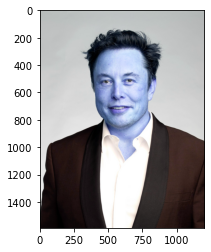

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1590, 1200)

In [5]:
gray

array([[190, 189, 189, ..., 182, 182, 182],
       [189, 189, 189, ..., 182, 182, 182],
       [189, 189, 189, ..., 182, 182, 182],
       ...,
       [ 10,  10,  11, ...,  26,  26,  27],
       [ 10,  11,  11, ...,  25,  25,  25],
       [ 10,  11,  11, ...,  24,  23,  23]], dtype=uint8)

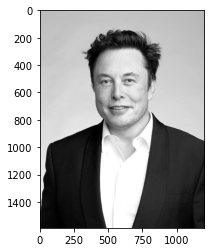

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
#Haar cascade is used to detect face features

In [8]:
#pretrained classifiers
face_cascade = cv2.CascadeClassifier('D:\Code-Python\opencv-master\data\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('D:\Code-Python\opencv-master\data\haarcascades\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[328, 317, 494, 494]])

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(328, 317, 494, 494)

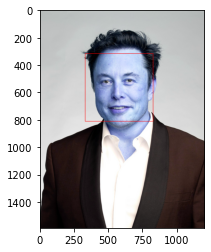

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

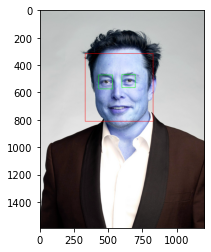

In [11]:
#code from opencv documentation
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

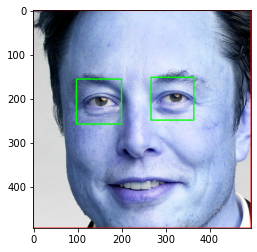

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

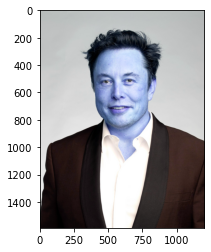

In [14]:
original_image=cv2.imread('C:\\Users\\ACER\\OneDrive\\Desktop\\Python\\Data Science\\Projects\\Image Classification\\test_images\\Elon Musk - Wikipedia.jpg')
plt.imshow(original_image)

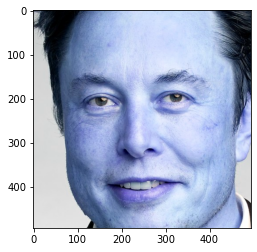

In [15]:
cropped_image = get_cropped_image_if_2_eyes('C:\\Users\\ACER\\OneDrive\\Desktop\\Python\\Data Science\\Projects\\Image Classification\\test_images\\Elon Musk - Wikipedia.jpg')
plt.imshow(cropped_image)

In [16]:
org_image_obstructed = cv2.imread('C:\\Users\\ACER\\OneDrive\\Desktop\\Python\\Data Science\\Projects\\Image Classification\\test_images\\Elon Musk is dangerously wrong about.jpg')

In [17]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('C:\\Users\\ACER\\OneDrive\\Desktop\\Python\\Data Science\\Projects\\Image Classification\\test_images\\Elon Musk is dangerously wrong about.jpg')
cropped_image_no_2_eyes

#no output: not considered

array([[[13, 16, 24],
        [16, 19, 27],
        [20, 23, 31],
        ...,
        [25, 23, 22],
        [25, 23, 22],
        [25, 23, 22]],

       [[19, 22, 30],
        [21, 24, 32],
        [22, 25, 33],
        ...,
        [25, 23, 22],
        [25, 23, 22],
        [25, 23, 22]],

       [[23, 26, 34],
        [23, 26, 34],
        [22, 25, 33],
        ...,
        [25, 23, 22],
        [25, 23, 22],
        [25, 23, 22]],

       ...,

       [[35, 27, 27],
        [35, 27, 27],
        [38, 30, 30],
        ...,
        [13,  5,  6],
        [13,  5,  6],
        [12,  4,  5]],

       [[35, 27, 27],
        [35, 27, 27],
        [38, 30, 30],
        ...,
        [13,  5,  6],
        [13,  5,  6],
        [11,  3,  4]],

       [[37, 29, 29],
        [37, 29, 29],
        [34, 29, 28],
        ...,
        [13,  5,  6],
        [13,  5,  6],
        [13,  5,  6]]], dtype=uint8)

In [18]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./dataset/cropped',
 './dataset/elon musk',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 

cropped
elon musk
Generating cropped images in folder:  ./dataset/cropped/elon musk
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [26]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'elon musk': ['./dataset/cropped/elon musk\\elon musk1.png',
  './dataset/cropped/elon musk\\elon musk10.png',
  './dataset/cropped/elon musk\\elon musk11.png',
  './dataset/cropped/elon musk\\elon musk12.png',
  './dataset/cropped/elon musk\\elon musk13.png',
  './dataset/cropped/elon musk\\elon musk14.png',
  './dataset/cropped/elon musk\\elon musk15.png',
  './dataset/cropped/elon musk\\elon musk16.png',
  './dataset/cropped/elon musk\\elon musk17.png',
  './dataset/cropped/elon musk\\elon musk18.png',
  './dataset/cropped/elon musk\\elon musk19.png',
  './dataset/cropped/elon musk\\elon musk2.png',
  './dataset/cropped/elon musk\\elon musk20.png',
  './dataset/cropped/elon musk\\elon musk21.png',
  './dataset/cropped/elon musk\\elon musk22.png',
  './dataset/cropped/elon musk\\elon musk24.png',
  './dataset/cropped/elon musk\\elon musk25.png',
  './dataset/cropped/elon musk\\elon musk26.png',
  './dataset/cropped/elon musk\\elon musk27.png',
  './dataset/cropped/elon musk\\elon mu

In [23]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

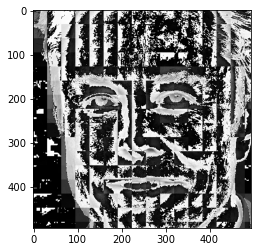

In [25]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [28]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'elon musk': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [33]:
 X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  #Vertical Stacking

In [34]:
len(X), len(X[0])

(210, 4096)

In [35]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(210, 4096)